<a href="https://colab.research.google.com/github/venkatesh-eranti/stackoverflow_2020_survey/blob/main/Stackoverflow_2020_survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[stackoverflow survey 2020](https://insights.stackoverflow.com/survey/2020)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('survey_results_public.csv')

In [ ]:
survey_results_schema=pd.read_csv('survey_results_schema.csv')

In [ ]:
df.shape

(64461, 61)

In [ ]:
df.head(2)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4


In [ ]:
survey_results_schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


In [78]:
df['DevType'].isnull().sum()

15091

In [79]:
DevType=df['DevType'][~(df['DevType'].isnull())]

In [80]:
DevType=DevType.str.split(';')

In [81]:
DevType

0        [Developer, desktop or enterprise applications...
1               [Developer, full-stack, Developer, mobile]
5        [Designer, Developer, front-end, Developer, mo...
6        [Developer, back-end, Developer, front-end, De...
7        [Developer, back-end, Developer, desktop or en...
                               ...                        
64448    [Developer, back-end, Developer, desktop or en...
64449                                  [Developer, mobile]
64451      [Data scientist or machine learning specialist]
64453    [Data or business analyst, Developer, mobile, ...
64456                                [Senior executive/VP]
Name: DevType, Length: 49370, dtype: object

In [82]:
dev_type_count={}
for i in DevType:
    for p in i:
        if p in dev_type_count:
            dev_type_count[p]+=1
        else:
            dev_type_count[p]=1
dev_type_count

{'Academic researcher': 3552,
 'Data or business analyst': 4024,
 'Data scientist or machine learning specialist': 3988,
 'Database administrator': 5722,
 'Designer': 5321,
 'DevOps specialist': 5969,
 'Developer, QA or test': 3947,
 'Developer, back-end': 27228,
 'Developer, desktop or enterprise applications': 11784,
 'Developer, embedded applications or devices': 4750,
 'Developer, front-end': 18296,
 'Developer, full-stack': 27125,
 'Developer, game or graphics': 2789,
 'Developer, mobile': 9482,
 'Educator': 2928,
 'Engineer, data': 3738,
 'Engineer, site reliability': 1940,
 'Engineering manager': 2724,
 'Marketing or sales professional': 642,
 'Product manager': 2497,
 'Scientist': 2086,
 'Senior executive/VP': 1320,
 'System administrator': 5242}

In [83]:
devtype_df=pd.DataFrame(list(dev_type_count.items()),columns=['Developer Type','count'])

In [86]:
devtype_df=devtype_df.sort_values(by='count',ascending=False)

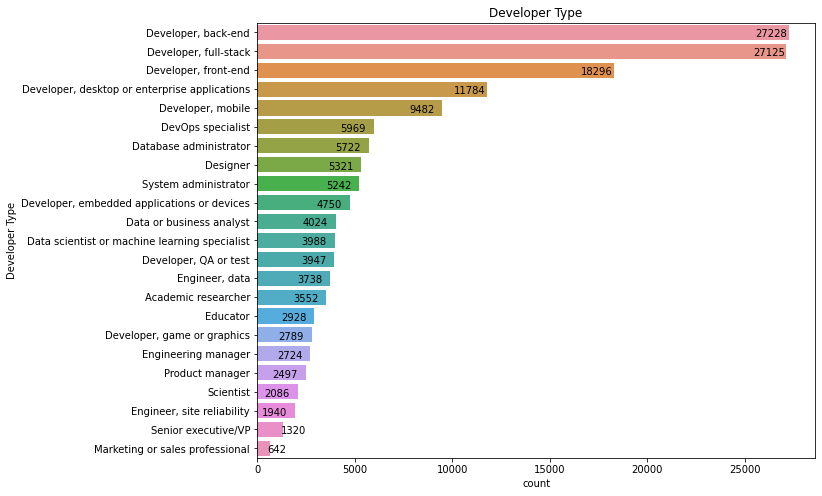

In [99]:
plt.figure(figsize=(10,8))
sns.barplot(x=devtype_df['count'],y=devtype_df['Developer Type'])
plt.title('Developer Type')
for i,v in enumerate(devtype_df['count']):
    if v>1900:
        plt.text(v-1700,i+0.25,str(v))
    else:
        plt.text(v-100,i+0.25,str(v))

In [105]:
devtype_df['percentage']=(devtype_df['count']/len(DevType))*100
devtype_df

,Developer Type,count,percentage
5,"Developer, back-end",27228,55.150901
1,"Developer, full-stack",27125,54.942273
4,"Developer, front-end",18296,37.058943
0,"Developer, desktop or enterprise applications",11784,23.868746
2,"Developer, mobile",9482,19.205996
7,DevOps specialist,5969,12.090338
9,Database administrator,5722,11.590034
3,Designer,5321,10.777800
13,System administrator,5242,10.617784
10,"Developer, embedded applications or devices",4750,9.621227


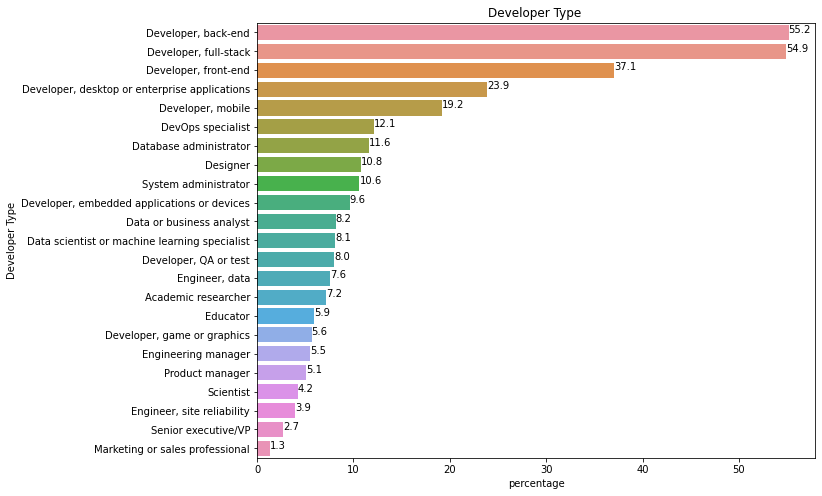

In [108]:
plt.figure(figsize=(10,8))
sns.barplot(x=devtype_df['percentage'],y=devtype_df['Developer Type'])
plt.title('Developer Type ')
for i,v in enumerate(devtype_df['percentage']):
    plt.text(v,i,str(round(v,1)))

# formal education importance

In [110]:
df['NEWEdImpt'].isnull().sum()

15996

In [111]:
formal_education=df['NEWEdImpt'][~df['NEWEdImpt'].isnull()]
formal_education

0                          Fairly important
1                          Fairly important
3        Not at all important/not necessary
4                            Very important
5                          Fairly important
                        ...                
64449                        Very important
64451                      Fairly important
64453                        Very important
64456                        Very important
64460                  Critically important
Name: NEWEdImpt, Length: 48465, dtype: object

In [112]:
formal_dict={}
for i in formal_education:
    if i in formal_dict:
        formal_dict[i]+=1
    else:
        formal_dict[i]=1
formal_dict

{'Critically important': 4752,
 'Fairly important': 12674,
 'Not at all important/not necessary': 7785,
 'Somewhat important': 11388,
 'Very important': 11866}

In [116]:
formal_education_df=pd.DataFrame(list(formal_dict.items()),columns=['formal_education','count'])
formal_education_df=formal_education_df.sort_values(by='count',ascending=False)
formal_education_df['percentage']=round((formal_education_df['count']/len(formal_education))*100,1)
formal_education_df

,formal_education,count,percentage
0,Fairly important,12674,26.2
2,Very important,11866,24.5
3,Somewhat important,11388,23.5
1,Not at all important/not necessary,7785,16.1
4,Critically important,4752,9.8


Text(0.5, 1.0, 'Formal Education Importance')

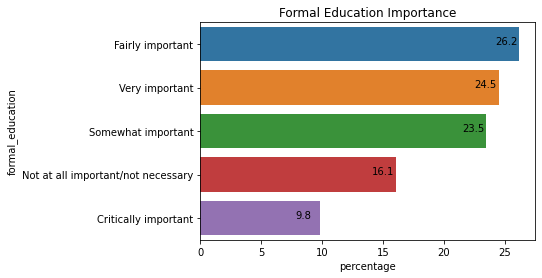

In [121]:
sns.barplot(x=formal_education_df['percentage'],y=formal_education_df['formal_education']);
for i,v in enumerate(formal_education_df['percentage']):
    plt.text(v-2,i,str(v))
plt.title('Formal Education Importance')

In [ ]:
df['LanguageDesireNextYear'].isnull().sum()

10348

In [ ]:
desired_languages=df['LanguageDesireNextYear'][~df['LanguageDesireNextYear'].isnull()]

In [ ]:
desired_languages=desired_languages.apply(lambda x:x.replace('#','sharp'))

In [ ]:
desired_languages=desired_languages.apply(lambda x:x.replace('++','_plus_plus'))

In [ ]:
desired_languages=desired_languages.str.split(';')

In [ ]:
languages_count={}
for i in desired_languages:
    for p in i:
        if p in languages_count:
            languages_count[p]+=1
        else:
            languages_count[p]=1
languages_count

{'Assembly': 2469,
 'Bash/Shell/PowerShell': 11728,
 'C': 6091,
 'C_plus_plus': 9756,
 'Csharp': 13674,
 'Dart': 4742,
 'Go': 12605,
 'HTML/CSS': 20771,
 'Haskell': 2996,
 'Java': 13264,
 'JavaScript': 26188,
 'Julia': 1661,
 'Kotlin': 9575,
 'Objective-C': 1525,
 'PHP': 7106,
 'Perl': 1150,
 'Python': 26682,
 'R': 4271,
 'Ruby': 4184,
 'Rust': 10563,
 'SQL': 19970,
 'Scala': 3465,
 'Swift': 5643,
 'TypeScript': 17150,
 'VBA': 1055}

In [ ]:
desired_lang_def=pd.DataFrame(list(languages_count.items()),columns=['desired_language','count'])
desired_lang_def=desired_lang_def.sort_values(by='count',ascending=False)

Text(0.5, 1.0, 'Language Desire Next Year')

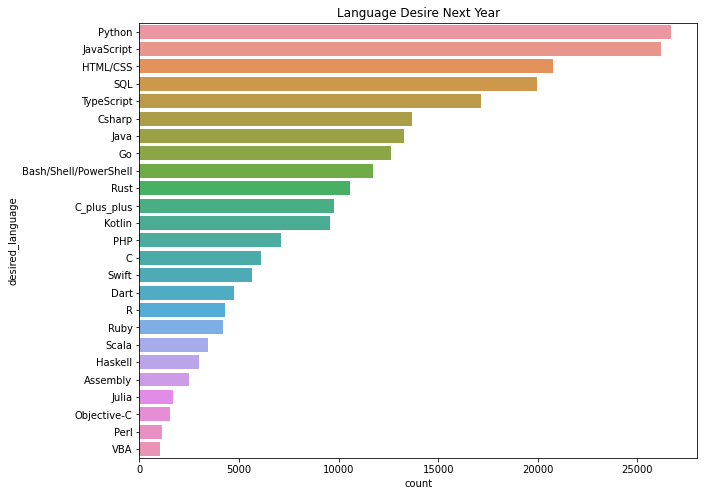

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(y=desired_lang_def['desired_language'],x=desired_lang_def['count'])
plt.title('Language Desire Next Year')

In [ ]:
df['LanguageWorkedWith'].str.contains('Python').sum()

25287

In [ ]:
Language_Worked_With=df['LanguageWorkedWith'][~df['LanguageWorkedWith'].isnull()]

In [ ]:
Language_Worked_With=Language_Worked_With.apply(lambda x:x.replace('#','sharp'))
Language_Worked_With=Language_Worked_With.apply(lambda x:x.replace('++','_plus_plus'))
Language_Worked_With=Language_Worked_With.str.split(';')

In [ ]:
languages_worked={}
for i in Language_Worked_With:
    for p in i:
        if p in languages_worked:
            languages_worked[p]+=1
        else:
            languages_worked[p]=1
languages_worked

{'Assembly': 3553,
 'Bash/Shell/PowerShell': 18980,
 'C': 12487,
 'C_plus_plus': 13707,
 'Csharp': 18041,
 'Dart': 2280,
 'Go': 5038,
 'HTML/CSS': 36181,
 'Haskell': 1222,
 'Java': 23074,
 'JavaScript': 38822,
 'Julia': 519,
 'Kotlin': 4468,
 'Objective-C': 2340,
 'PHP': 15007,
 'Perl': 1796,
 'Python': 25287,
 'R': 3288,
 'Ruby': 4046,
 'Rust': 2929,
 'SQL': 31413,
 'Scala': 2052,
 'Swift': 3397,
 'TypeScript': 14578,
 'VBA': 3499}

In [ ]:
Language_Worked_With_df=pd.DataFrame(list(languages_worked.items()),columns=['Language_Worked_With','count'])
Language_Worked_With_df=Language_Worked_With_df.sort_values(by='count',ascending=False)

In [ ]:
Language_Worked_With_df

,Language_Worked_With,count
2,JavaScript,38822
1,HTML/CSS,36181
7,SQL,31413
5,Python,25287
8,Java,23074
12,Bash/Shell/PowerShell,18980
0,Csharp,18041
9,PHP,15007
11,TypeScript,14578
18,C_plus_plus,13707


Text(0.5, 1.0, 'Language Worked With')

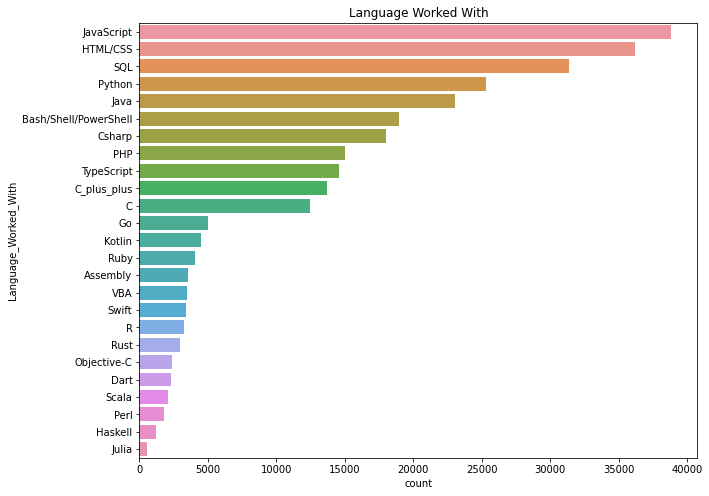

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(y=Language_Worked_With_df['Language_Worked_With'],x=Language_Worked_With_df['count'])
plt.title('Language Worked With')

In [ ]:
loved_lang_df=df[['LanguageDesireNextYear','LanguageWorkedWith']]
loved_lang_df.head()

,LanguageDesireNextYear,LanguageWorkedWith
0,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript
1,Python;Swift,JavaScript;Swift
2,Objective-C;Python;Swift,Objective-C;Python;Swift
3,NaN,NaN
4,Java;Ruby;Scala,HTML/CSS;Ruby;SQL


In [ ]:
loved_lang_df=loved_lang_df.dropna()

In [ ]:
loved_lang_df=loved_lang_df.applymap(lambda x:x.replace('#','sharp'))
loved_lang_df=loved_lang_df.applymap(lambda x:x.replace('++','_plus_plus'))
loved_lang_df

,LanguageDesireNextYear,LanguageWorkedWith
0,Csharp;HTML/CSS;JavaScript,Csharp;HTML/CSS;JavaScript
1,Python;Swift,JavaScript;Swift
2,Objective-C;Python;Swift,Objective-C;Python;Swift
4,Java;Ruby;Scala,HTML/CSS;Ruby;SQL
5,HTML/CSS;Java;JavaScript,HTML/CSS;Java;JavaScript
...,...,...
64447,PHP;Python,Csharp;HTML/CSS;Java;JavaScript;Swift
64453,C_plus_plus;HTML/CSS,C_plus_plus;HTML/CSS
64457,Assembly;Bash/Shell/PowerShell;C;Csharp;C_plus...,Assembly;Bash/Shell/PowerShell;C;Csharp;C_plus...
64459,HTML/CSS;Java;JavaScript,HTML/CSS


In [ ]:
loved_lang_df=loved_lang_df.applymap(lambda x:x.split(';'))

In [ ]:
loved_lang={}
for i in loved_lang_df:
    for p in loved_lang_df[i]:
        for l in p:
            if l in loved_lang:
                loved_lang[l]+=1
            else:
                loved_lang[l]=1
loved_lang

{'Assembly': 5720,
 'Bash/Shell/PowerShell': 29647,
 'C': 17627,
 'C_plus_plus': 22372,
 'Csharp': 30415,
 'Dart': 6830,
 'Go': 17323,
 'HTML/CSS': 54450,
 'Haskell': 4123,
 'Java': 34704,
 'JavaScript': 62287,
 'Julia': 2100,
 'Kotlin': 13716,
 'Objective-C': 3645,
 'PHP': 20971,
 'Perl': 2768,
 'Python': 50267,
 'R': 7339,
 'Ruby': 7938,
 'Rust': 13341,
 'SQL': 49300,
 'Scala': 5382,
 'Swift': 8755,
 'TypeScript': 30810,
 'VBA': 4238}

In [ ]:
loved_lang_df=pd.DataFrame(list(loved_lang.items()),columns=['langauage','count'])
loved_lang_df=loved_lang_df.sort_values(by='count',ascending=False)
loved_lang_df

,langauage,count
2,JavaScript,62287
1,HTML/CSS,54450
3,Python,50267
12,SQL,49300
6,Java,34704
14,TypeScript,30810
0,Csharp,30415
16,Bash/Shell/PowerShell,29647
20,C_plus_plus,22372
9,PHP,20971


Text(0.5, 1.0, 'Loved Languages')

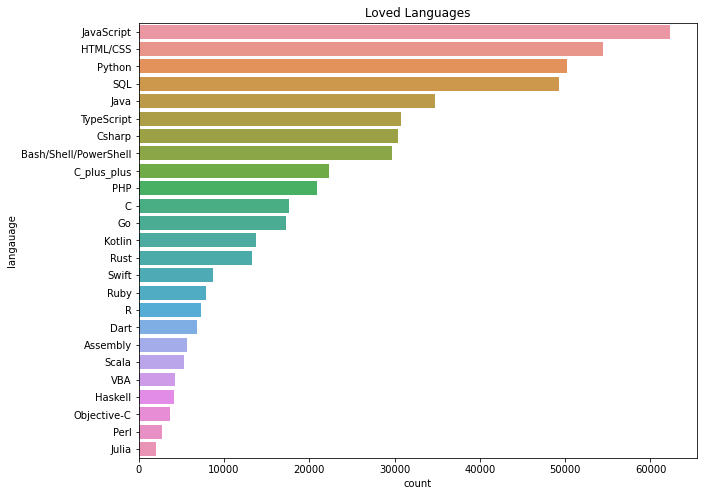

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=loved_lang_df['count'],y=loved_lang_df['langauage'])
plt.title('Loved Languages')